In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale



In [3]:
df = wrangle.wrangle_churn()
df.head()

,customer_id,monthly_charges,tenure,total_charges,contract_type,internet_type
0,0013-SMEOE,109.70,71,7904.25,Two year,2
1,0014-BMAQU,84.65,63,5377.80,Two year,2
2,0016-QLJIS,90.45,65,5957.90,Two year,1
3,0017-DINOC,45.20,54,2460.55,Two year,1
4,0017-IUDMW,116.80,72,8456.75,Two year,2


In [5]:
train, test = train_test_split(df,train_size=.75,random_state=123)

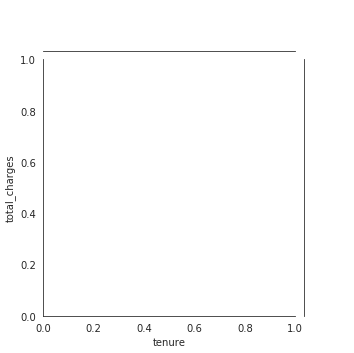

In [7]:
grid = sns.JointGrid(x='tenure',y='total_charges',data=train,height=5);
g = grid.plot_joint